In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from data_boxscore.data import load_dataframes
from data_boxscore.elo import compute_ELO, compute_kl_divergence
from data_boxscore.constants import features_minmax, features_no_scaling, features_perc, features_robust, features_standard
%reload_ext autoreload
%autoreload 2


In [8]:
gdf, X_train, y_train, X_val, y_val, X_test, y_test, _, _ = load_dataframes(filename='bball.csv',
                                                                    features_standard = features_standard, 
                                                                    features_minmax = features_minmax, 
                                                                    features_robust = features_robust, 
                                                                    features_perc = features_perc,
                                                                    features_no_scaling = features_no_scaling,              
                                                                    use_ELO = True,
                                                                    k_elo = 20)
print(gdf.shape, X_train.shape, X_val.shape ,X_test.shape, )
gdf['home_win'].mean()

(840, 58) (504, 54) (126, 54) (126, 54)


0.6

In [9]:
gdf.head()

,away_team,home_team,A_score,H_score,A_FGM,H_FGM,A_FGA,H_FGA,A_FG%,H_FG%,...,H_eFG%,A_eFG%,H_OREB%,A_OREB%,H_TOV%,A_TOV%,diff_score,home_win,ELO_diff_before,split
game_id,,,,,,,,,,,,,,,,,,,,,
0,CCC Polkowice,Pieštanské Cajky,71,46,24,14,54,49,0.444444,0.285714,...,0.326531,0.509259,0.216216,0.264706,0.236097,0.201918,-25,False,0.0,0
1,Pieštanské Cajky,CCC Polkowice,60,76,24,27,65,53,0.369231,0.509434,...,0.584906,0.407692,0.230769,0.300000,0.230651,0.180549,16,True,20.0,0
2,BLMA,KSC Szekszard,79,80,29,28,48,59,0.604167,0.474576,...,0.550847,0.625000,0.382353,0.363636,0.199437,0.227638,1,True,0.0,0
3,KSC Szekszard,BLMA,71,86,26,30,58,56,0.448276,0.535714,...,0.598214,0.534483,0.400000,0.322581,0.234632,0.242718,15,True,-20.0,0
4,Galatasaray,Sopron Basket,55,72,23,29,71,58,0.323944,0.500000,...,0.517241,0.345070,0.357143,0.224490,0.270880,0.165125,17,True,0.0,0


In [10]:
gdf, elo_end = compute_ELO(gdf, k_elo=20, return_elo_end=True)
gdf

,away_team,home_team,A_score,H_score,A_FGM,H_FGM,A_FGA,H_FGA,A_FG%,H_FG%,...,H_eFG%,A_eFG%,H_OREB%,A_OREB%,H_TOV%,A_TOV%,diff_score,home_win,ELO_diff_before,split
game_id,,,,,,,,,,,,,,,,,,,,,
0,CCC Polkowice,Pieštanské Cajky,71,46,24,14,54,49,0.444444,0.285714,...,0.326531,0.509259,0.216216,0.264706,0.236097,0.201918,-25,False,0.000000,0
1,Pieštanské Cajky,CCC Polkowice,60,76,24,27,65,53,0.369231,0.509434,...,0.584906,0.407692,0.230769,0.300000,0.230651,0.180549,16,True,20.000000,0
2,BLMA,KSC Szekszard,79,80,29,28,48,59,0.604167,0.474576,...,0.550847,0.625000,0.382353,0.363636,0.199437,0.227638,1,True,0.000000,0
3,KSC Szekszard,BLMA,71,86,26,30,58,56,0.448276,0.535714,...,0.598214,0.534483,0.400000,0.322581,0.234632,0.242718,15,True,-20.000000,0
4,Galatasaray,Sopron Basket,55,72,23,29,71,58,0.323944,0.500000,...,0.517241,0.345070,0.357143,0.224490,0.270880,0.165125,17,True,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,Beretta Famila Schio,ZVVZ USK Praha,54,74,18,32,58,69,0.310345,0.463768,...,0.478261,0.362069,0.289474,0.170732,0.119904,0.198511,20,True,51.885950,3
839,Cukurova Basketbol Mersin,Fenerbahce Alagoz Holding,80,89,31,36,64,67,0.484375,0.537313,...,0.597015,0.523438,0.354839,0.314286,0.183993,0.142993,9,True,141.764856,3
840,ZVVZ USK Praha,Villeneuve d'Ascq LM,78,84,30,32,68,66,0.441176,0.484848,...,0.545455,0.507353,0.272727,0.289474,0.119789,0.170765,6,True,-134.554228,3


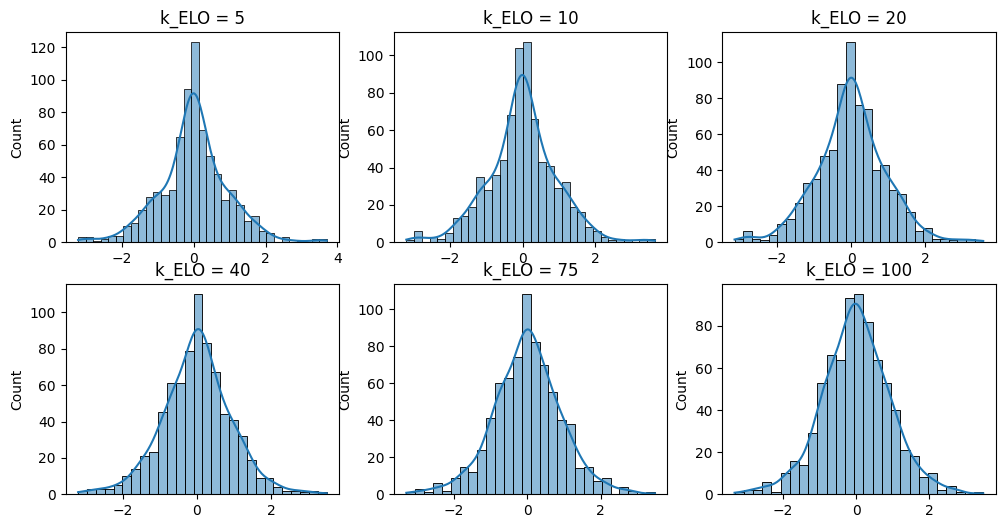

In [11]:
fig, axs = plt.subplots(2,3, figsize = (12,6))
for i,k_elo in enumerate([5,10,20,40,75,100]):
    df = compute_ELO(gdf, k_elo)
    train_data = df[df['split'] == 1]['ELO_diff_before'].values.reshape(-1,1)
    data = df[df['split'] != 0]['ELO_diff_before'].values.reshape(-1,1)
    scaler = StandardScaler()
    scaler.fit(train_data)
    data = scaler.transform(data)
    sns.histplot(data, kde = True,ax = axs[i//3, i%3], legend=False)
    axs[i//3, i%3].set_title(f"k_ELO = {k_elo}")    
    
    

In [12]:
elos = {}
for k_elo in range(5,101,5):
    df = compute_ELO(gdf, k_elo)
    train_data = df[df['split'] == 1]['ELO_diff_before'].values.reshape(-1,1)
    data = df[df['split'] != 0]['ELO_diff_before'].values.reshape(-1,1)
    scaler = StandardScaler()
    scaler.fit(train_data)
    data = scaler.transform(data)
    elos[k_elo] = data

In [13]:
kls = []
for k,v in elos.items():
    tmp = {}
    for k2,v2 in elos.items():
        tmp[k2] = compute_kl_divergence(v,v2, bins=50)
    kls.append(tmp)
kldf = pd.DataFrame(kls, index = elos.keys())

In [14]:
print(f"{kldf.max().max():.3f}")
kldf.round(2)

0.269


,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100
5,0.00,0.05,0.14,0.20,0.24,0.24,0.25,0.19,0.11,0.11,0.11,0.11,0.12,0.11,0.19,0.27,0.19,0.23,0.23,0.24
10,0.07,0.00,0.07,0.09,0.23,0.24,0.20,0.17,0.13,0.09,0.11,0.15,0.12,0.14,0.21,0.21,0.13,0.16,0.16,0.17
15,0.14,0.06,0.00,0.07,0.08,0.21,0.19,0.11,0.14,0.18,0.14,0.15,0.16,0.22,0.19,0.19,0.21,0.25,0.26,0.25
20,0.15,0.18,0.05,0.00,0.04,0.12,0.15,0.16,0.09,0.10,0.09,0.10,0.12,0.14,0.13,0.18,0.20,0.18,0.18,0.18
25,0.22,0.21,0.08,0.07,0.00,0.06,0.09,0.12,0.12,0.10,0.10,0.12,0.12,0.13,0.11,0.15,0.25,0.24,0.22,0.20
30,0.18,0.24,0.10,0.08,0.08,0.00,0.04,0.08,0.08,0.08,0.07,0.08,0.11,0.15,0.14,0.18,0.23,0.26,0.20,0.20
35,0.20,0.19,0.07,0.18,0.09,0.04,0.00,0.01,0.09,0.03,0.12,0.08,0.08,0.12,0.12,0.16,0.26,0.26,0.23,0.23
40,0.20,0.15,0.16,0.20,0.18,0.15,0.11,0.00,0.06,0.05,0.11,0.07,0.10,0.12,0.13,0.13,0.23,0.23,0.23,0.25
45,0.16,0.20,0.14,0.15,0.21,0.16,0.12,0.03,0.00,0.01,0.11,0.06,0.13,0.13,0.14,0.11,0.21,0.20,0.20,0.25
50,0.13,0.18,0.14,0.14,0.12,0.08,0.07,0.05,0.01,0.00,0.03,0.07,0.13,0.14,0.13,0.10,0.20,0.19,0.19,0.24
